TITANIC SURVIVAL PREDICTION

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [ ]:
df=pd.read_csv("/content/TitanicDataset.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.shape

(891, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
df=df.drop(columns='Cabin',axis=1)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df["Age"].isna().sum()

np.int64(177)

In [ ]:
df["Age"].mean()

np.float64(29.69911764705882)

In [ ]:
df["Age"]=df["Age"].fillna(df["Age"].mean())
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [ ]:
df["Embarked"].mode()

,Embarked
0,S


In [ ]:
df["Embarked"]=df["Embarked"].fillna(df["Embarked"].mode()[0])
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [ ]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
df["Parch"].value_counts(),df["SibSp"].value_counts()

(Parch
 0    678
 1    118
 2     80
 5      5
 3      5
 4      4
 6      1
 Name: count, dtype: int64,
 SibSp
 0    608
 1    209
 2     28
 4     18
 3     16
 8      7
 5      5
 Name: count, dtype: int64)

In [ ]:
df["family"]=df["SibSp"]+df["Parch"]
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0


In [ ]:
def func(cols):
  if cols["Age"]<=12:
    return "Children"
  elif cols["Age"]>12 and cols["Age"]<=60:
    return "Adult"
  else:
    return "Senior"

In [ ]:
df["Age_category"]=df[["Age"]].apply(func,axis=1)
df["Age_category"].value_counts()

,count
Age_category,
Adult,800
Children,69
Senior,22


In [ ]:
df["Survived"].value_counts()

,count
Survived,
0,549
1,342


In [ ]:
df["Sex"].value_counts(normalize=True)

,proportion
Sex,
male,0.647587
female,0.352413


In [ ]:
df.groupby("Sex")[["Survived"]].value_counts(normalize=True)

Sex     Survived
female  1           0.742038
        0           0.257962
male    0           0.811092
        1           0.188908
Name: proportion, dtype: float64

<Axes: xlabel='Sex', ylabel='count'>

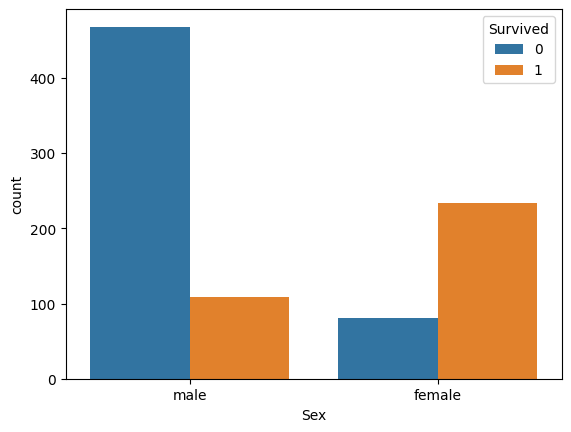

In [ ]:
sns.countplot(x="Sex",hue="Survived",data=df)

In [ ]:
df.groupby("Pclass")[["Survived"]].value_counts()

Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: count, dtype: int64

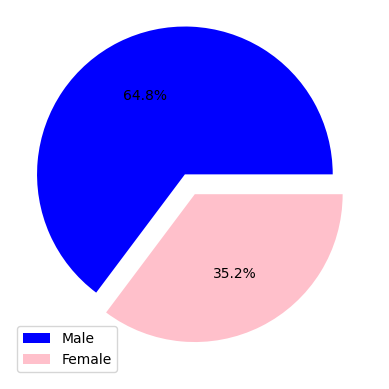

In [ ]:
# total percent of male and female
plt.pie(df["Sex"].value_counts(normalize=True),colors=["b","pink"],autopct="%1.1f%%",explode=[0.15,0])
plt.legend(["Male","Female"])
plt.show()

<Axes: xlabel='Sex', ylabel='count'>

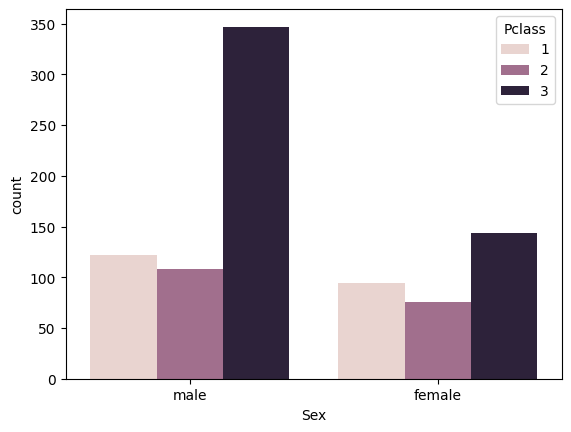

In [ ]:
sns.countplot(x="Sex",hue="Pclass",data=df)


In [ ]:
df["Pclass"].value_counts()

,count
Pclass,
3,491
1,216
2,184


<Axes: xlabel='Pclass', ylabel='Survived'>

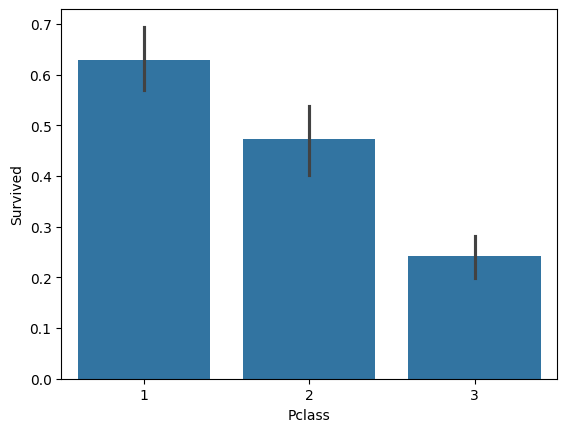

In [ ]:
sns.barplot(x="Pclass",y="Survived",data=df)


In [ ]:
df.groupby("Pclass")[["Fare"]].mean()

,Fare
Pclass,
1,84.154687
2,20.662183
3,13.675550


In [ ]:
df["Fare"].sort_values(ascending=False).head(10)

,Fare
679,512.3292
258,512.3292
737,512.3292
88,263.0000
438,263.0000
341,263.0000
27,263.0000
742,262.3750
311,262.3750
299,247.5208


<Axes: xlabel='Survived', ylabel='Fare'>

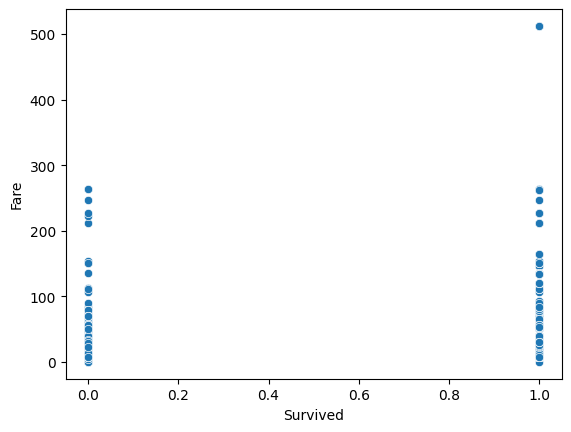

In [ ]:
sns.scatterplot(x=df["Survived"],y=df["Fare"])

In [ ]:
df.groupby("Sex")[["Age_category"]].value_counts()

Sex     Age_category
female  Adult           279
        Children         32
        Senior            3
male    Adult           521
        Children         37
        Senior           19
Name: count, dtype: int64

In [ ]:
df.groupby("Survived")[["Age_category"]].value_counts()

Survived  Age_category
0         Adult           503
          Children         29
          Senior           17
1         Adult           297
          Children         40
          Senior            5
Name: count, dtype: int64

<Axes: xlabel='Age_category', ylabel='count'>

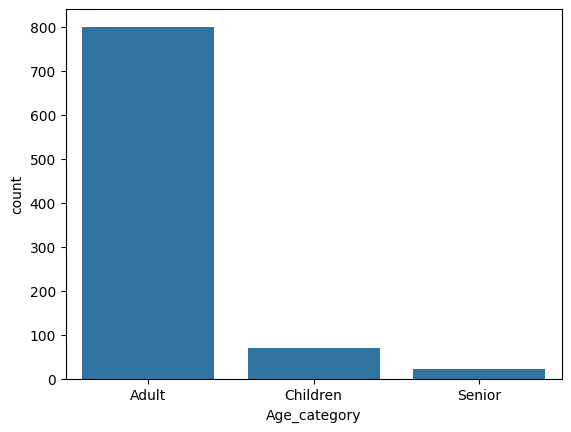

In [ ]:
sns.countplot(x="Age_category",data=df)

In [ ]:
large_family=sum(df["family"]>=5)
large_family

47

In [ ]:
family=df["family"].sum()
small_family=family-large_family
small_family

np.int64(759)

<Axes: xlabel='Survived', ylabel='Fare'>

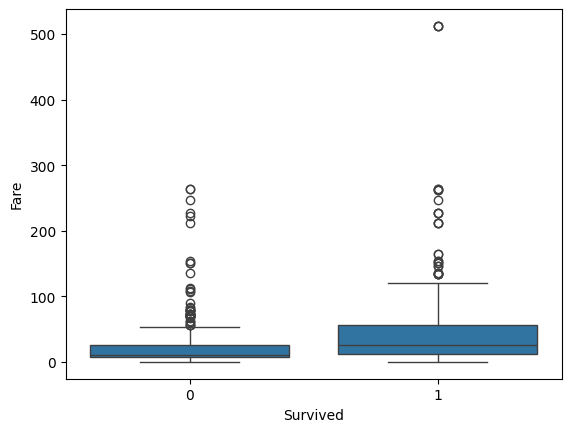

In [ ]:
sns.boxplot(x="Survived",y="Fare",data=df)  #outliers

In [ ]:
#df["Sex"]=df["Sex"].replace({"male":1,"female":0})
#df["Sex"]

Feature Engineering

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["Embarked"]=le.fit_transform(df["Embarked"])
df["Embarked"]
df["Sex"]=le.fit_transform(df["Sex"])
df["Sex"]

,Sex
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
df["Age"]=sc.fit_transform(df[["Age"]])
df["Age"]
df["Fare"]=sc.fit_transform(df[["Fare"]])
df["Fare"]


,Fare
0,-0.502445
1,0.786845
2,-0.488854
3,0.420730
4,-0.486337
...,...
886,-0.386671
887,-0.044381
888,-0.176263
889,-0.044381


In [ ]:
x=df.drop(columns=['PassengerId', 'Survived', 'Name','Parch','Ticket','family','Age_category'],axis=1)
y=df["Survived"]

<Axes: >

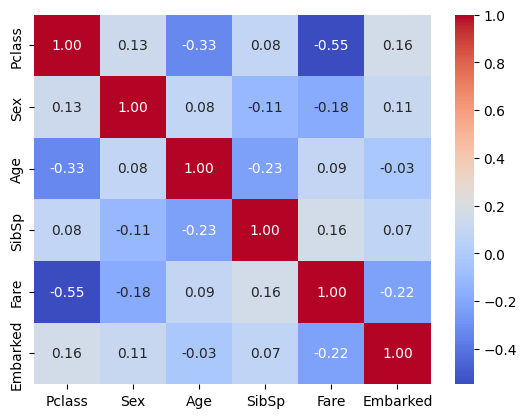

In [ ]:
sns.heatmap(x.corr(),annot=True,cmap="coolwarm",fmt=".2f")

In [ ]:
df.columns


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'family', 'Age_category'],
      dtype='object')

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [ ]:
x_train,x_test,y_train,y_test.size

(     Pclass  Sex       Age  SibSp      Fare  Embarked
 30        1    1  0.792698      0 -0.090272         0
 10        3    0 -1.977659      1 -0.312172         2
 873       3    1  1.331378      0 -0.467209         2
 182       3    1 -1.592887      4 -0.016444         2
 876       3    1 -0.746389      0 -0.450180         2
 ..      ...  ...       ...    ...       ...       ...
 534       3    0  0.023154      0 -0.474005         2
 584       3    1  0.000000      0 -0.472998         0
 493       1    1  3.178283      0  0.348330         0
 527       1    1  0.000000      0  3.817033         2
 168       1    1  0.000000      0 -0.126430         2
 
 [712 rows x 6 columns],
      Pclass  Sex       Age  SibSp      Fare  Embarked
 707       1    1  0.946606      0 -0.119131         2
 37        3    1 -0.669435      0 -0.486337         2
 615       2    0 -0.438572      1  0.660333         2
 169       3    1 -0.130754      0  0.489104         2
 68        3    0 -0.977252      4 -0.

In [ ]:
from sklearn.model_selection import KFold,cross_val_score,StratifiedKFold
k_fold=StratifiedKFold(n_splits=5,shuffle=True,random_state=42)

In [ ]:
model=LogisticRegression()
#model=SVC()
#model=RandomForestClassifier(n_estimators=100,max_depth=3,random_state=42)

In [ ]:
score=cross_val_score(model,x_train,y_train,cv=k_fold)
score.mean()

np.float64(0.8019895597360385)

In [ ]:
score.std()

np.float64(0.03859905552543427)

In [ ]:
model=model.fit(x_train,y_train)

In [ ]:
#Training accuracy

y_train_prediction=model.predict(x_train)
y_train_prediction


array([0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,

In [ ]:
from sklearn.metrics import accuracy_score
training_data_accuracy=accuracy_score(y_train,y_train_prediction)
print(training_data_accuracy)

0.8117977528089888


In [ ]:
y_pred=model.predict(x_test)
y_pred

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0])

In [ ]:
#ytest =balance unseen original output 20%
#xtest=  balance unseen original input   20%
#ypred= predicted output 20%
#ytrain_pred= trained output prediction 80%
#ytrain= trained output 80%
#xtrain= trained   input  80%


In [ ]:
Prediction=accuracy_score(y_test,y_pred)
print(Prediction)

0.7877094972067039


In [ ]:
pclass = int(input("Enter Pclass (1/2/3): "))
sex = input("Enter Sex (male/female): ")
age = float(input("Enter Age: "))
sibsp = int(input("Enter number of siblings/spouses aboard (SibSp): "))
fare = float(input("Enter Fare: "))
embarked = input("Enter Embarked (C/Q/S): ").upper()

Enter Pclass (1/2/3): 3
Enter Sex (male/female): male
Enter Age: 22
Enter number of siblings/spouses aboard (SibSp): 1
Enter Fare: 789
Enter Embarked (C/Q/S): s


In [ ]:
embarked_mapping = {'S': 0, 'C': 1, 'Q': 2}

# Ensure the LabelEncoder is fitted with 'male' and 'female'
#If it has been fitted before with the appropriate classes it will skip this step
if not hasattr(le, 'classes_') or not np.array_equal(le.classes_, ['female', 'male']):
    le.fit(['female', 'male'])  # Fitting with 'female', 'male' in this order for consistency

sex_encoded = le.transform([sex])[0]  # Now it should correctly transform 'male'/'female'
# Use the dictionary to get the encoded value for embarked
embarked_encoded = embarked_mapping.get(embarked)
# This will return the corresponding encoded value or None if embarked is invalid


#If none that means the entered value is not present in your dictionary
if embarked_encoded is None:
    print("Invalid Embarked value entered.")
else:
    # Apply scaling for Age and Fare (use same scaler used in training)
    age_scaled = sc.transform([[age]])[0][0]
    fare_scaled = sc.transform([[fare]])[0][0]

    # Combine into one array
    manual_input = np.array([[pclass, sex_encoded, age_scaled, sibsp, fare_scaled, embarked_encoded]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
prediction = model.predict(manual_input)

if prediction[0]==1:
  print("Survived")
else:
  print("Not Survived")

Not Survived


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


**MY OBSERVATION**


**"The data shows that most passengers were in the third class, with fewer in the first class. Passengers in the first class paid a higher fare and had a higher survival rate. Around 70% of women survived, whereas about 70% of men died, indicating that women had a higher survival rate. Both men and women were present in all passenger classes, but the data includes more male passengers than female passengers.**